### 5. 데이터 전처리(Preprocessing)
- 사이킷런 ML 알고리즘 적용 전 처리해야할 사항들
1. 결측값은 허용되지 않음.
    - 피처 평균값으로 대체하거나 대부분이 Null값이라면 드롭하는 것이 좋음
2. 문자열 값은 입력 값으로 허용하지 않음.
    - 인코딩을 통해 숫자 형으로 변환해야 함.
    - 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요하다면 삭제하는 것이 좋음   
    ex) 주민번호, 단순 문자열 아이디 -> 식별용이므로 예측의 중요한 요소 X

**데이터 인코딩**
- 레이블 인코딩(Label encoding)
    - 카테고리 피처를 코드형 숫자 값으로 변환
    - 숫자의 크고 작음에 대한 특성이 작용하므로 몇몇 ML 알고리즘에서는 성능이 떨어지는 경우 발생
    - 숫자의 차이가 모델에 영향을 미치는 선형 계열 모델(로지스틱회귀, SVM, 신경망)에는 사용하면 안됨.
    - 숫자의 차이가 모델에 영향을 주지 않는 트리 계열 모델(의사결정나무, 랜덤포레스트)에는 적용 가능
- 원-핫 인코딩(One Hot encoding)
    - 레이블 인코딩의 문제점 해결
    - 피처 값의 유형에 따라 새로운 피처 추가해 고유 값에 해당하는 칼럼에만 1을 추가하고 나머지 칼럼은 0으로 표시
    - 입력값으로 2차원 데이터 필요
    - OneHotEncoder를 이용한 변환 값이 희소 행렬(Sparse Matrix) 형태이므로 다시 toarray()메서드를 이용해 밀집 행렬(Dense Matrix)로 변환해야함.
        - 희소행렬 : 대부분의 값이 0인 행렬
        - 밀집행렬 : 대부분의 값이 1인 행렬

In [2]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [3]:
# 인코딩한 클래스 조회
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [4]:
# 인코딩된 값 다시 디코딩 (숫자 → 문자열)
encoder.inverse_transform([4,5,2,0,1,1,3,3])

array(['전자레인지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기'],
      dtype='<U5')

In [5]:
from sklearn.preprocessing import OneHotEncoder

# 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [43]:
#### 판다스로 원핫인코딩
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df) # 숫자형으로 변환 없이 바로 변환 가능

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

- 데이터들의 단위가 다르거나 범위가 다른 경우 비교가 어려움

- 피처 스케일링 : 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업
    - 표준화(Standardization) : 데이터의 피처 각각을 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환
     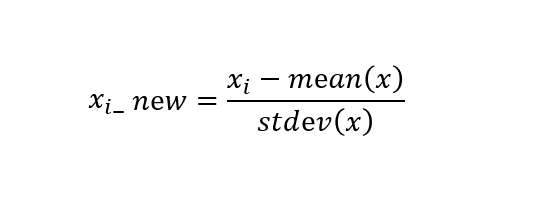
    - 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기 변환
    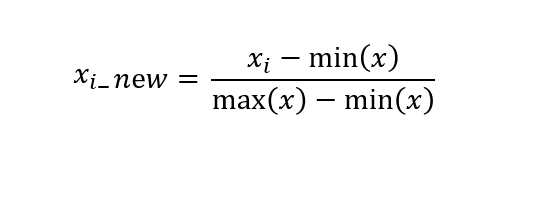

#### StandardScaler
- 사이킷런에서 제공하는 대표적 피처 스케일링 클래스
- 표준화 쉽게 지원하기 위한 클래스로 개별 피처를 평균이 0, 분산이 1인 값으로 변환
- 사이킷런의 RBF커널을 이용하는 SVM,로지스틱회귀는 가우시안 분포를 가정하고 구현됐으므로 사전에 표준화 적용하는 것이 예측 성능 향상에 매우 중요함

In [47]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean())
print('\n')
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print('\n')
print(iris_df_scaled.var())
# 모든 칼럼 값이 평균이 0에 아주 가깝고, 분산이 1에 아주 가까운 값으로 변횐됐음을 알 수 있음

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler
- 데이터값을 0 ~ 1 범위 값으로 변환 ( 음수가 있으면 -1~1로 변환 )
- 데이터의 분포가 가우시안 분포가 아닐 경우 적용 가능

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.min())
print('\n')
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 스케일링 변환 시 주의사항
- 학습 데이터로 fit(), transform()을 적용 시 테스트 데이터에서는 다시 fit()을 수행하지 않고 학습데이터로 fit() 적용한 결과를 이용해 transform()을 적용해야 함
- 테스트 데이터로 다시 새로운 스케일링 기준을 만들어 버리면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 달라지기 때문

In [8]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)

In [10]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled=scaler.transform(train_array)

print('원본 train_array:', np.round(train_array.reshape(-1),2))
print('scale이 적용된 train_array:', np.round(train_scaled.reshape(-1),2))

원본 train_array: [ 0  1  2  3  4  5  6  7  8  9 10]
scale이 적용된 train_array: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [11]:
scaler.fit(test_array)
test_scaled=scaler.transform(test_array)

print('원본 test_array:', np.round(test_array.reshape(-1),2))
print('scale이 적용된 test_array:', np.round(test_scaled.reshape(-1),2))

원본 test_array: [0 1 2 3 4 5]
scale이 적용된 test_array: [0.  0.2 0.4 0.6 0.8 1. ]


- ML 모델은 학습 데이터를 기반으로 학습이 되기 때문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준을 따라야 함.
- 가능하면 test,train 데이터셋을 나누기 전에 피처 스케일링을 적용하는게 좋음 ! 